In [1]:
import xarray as xr
import numpy as np
from oggm import utils
import matplotlib.pyplot as plt
import pandas as pd
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [2]:
ft = utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/cmip6/GCM/MRI-ESM2-0/MRI-ESM2-0_ssp126_r1i1p1f1_tas.nc')
ds1 = xr.open_dataset(ft, use_cftime=True)

In [3]:
ft = utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/cmip6/GCM/MRI-ESM2-0/MRI-ESM2-0_ssp534-over_r1i1p1f1_tas.nc')
ds2 = xr.open_dataset(ft, use_cftime=True)

ft = utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/cmip6/GCM/MRI-ESM2-0/MRI-ESM2-0_ssp585_r1i1p1f1_tas.nc')
ds3 = xr.open_dataset(ft, use_cftime=True)

In [4]:
ft = utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/cmip6/GCM/CESM2-WACCM/CESM2-WACCM_ssp534-over_r1i1p1f1_tas.nc')
ds4 = xr.open_dataset(ft, use_cftime=True)

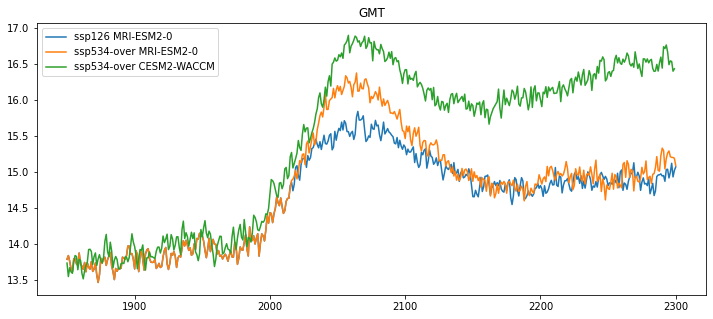

In [5]:
for ds, ssp in zip([ds1, ds2, ds4], ['ssp126 MRI-ESM2-0', 'ssp534-over MRI-ESM2-0', 'ssp534-over CESM2-WACCM']):
    weight = np.cos(np.deg2rad(ds.lat))
    weight = weight / weight.sum()
    zt = ds.tas.mean(dim='lon')  
    zt = (zt * weight).sum(dim='lat')
    zt = zt.resample(time='AS').mean()
    plt.plot(zt['time.year'], zt-273.15, label=ssp);
plt.legend();
plt.title('GMT');

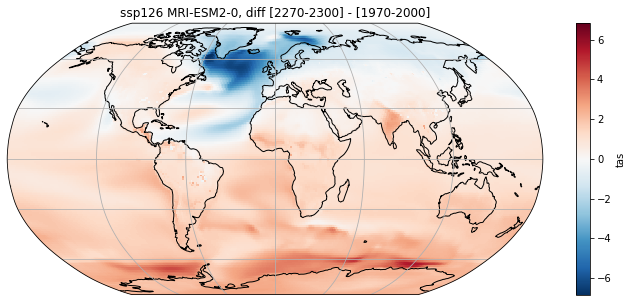

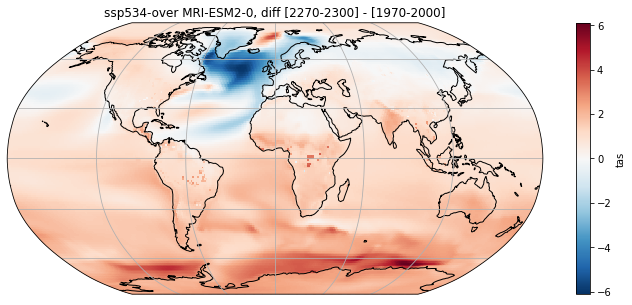

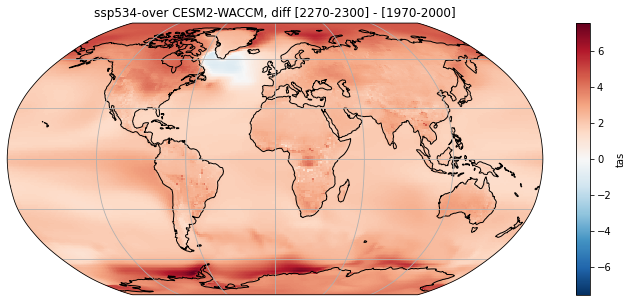

In [6]:
for ds, ssp in zip([ds1, ds2, ds4], ['ssp126 MRI-ESM2-0', 'ssp534-over MRI-ESM2-0', 'ssp534-over CESM2-WACCM']):

    t1 = ds.tas.sel(time=slice('1970','2000')).mean(dim='time')  
    t2 = ds.tas.sel(time=slice('2270','2300')).mean(dim='time')  

    plt.figure();
    # Define the map projection
    ax = plt.axes(projection=ccrs.Robinson())
    # ax is an empty plot. We now plot the variable sw_avg onto ax
    (t2-t1).plot(ax=ax, transform=ccrs.PlateCarree()) 
    # the keyword "transform" tells the function in which projection the data is stored 
    ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot
    plt.title(ssp + ', diff [2270-2300] - [1970-2000]');

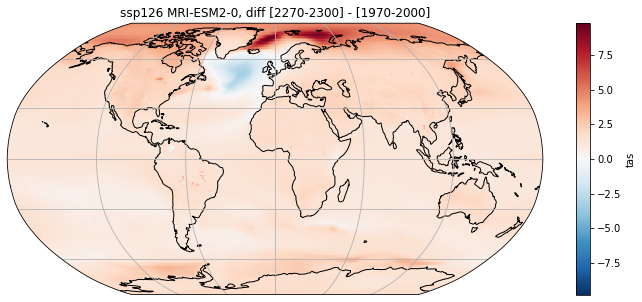

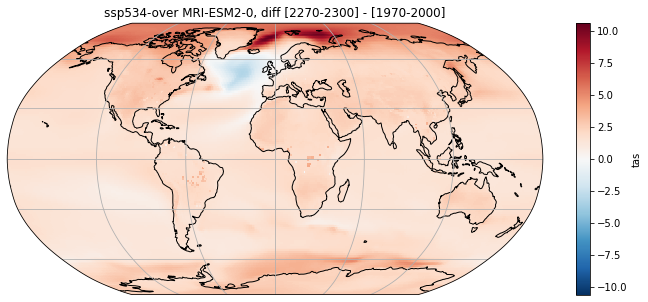

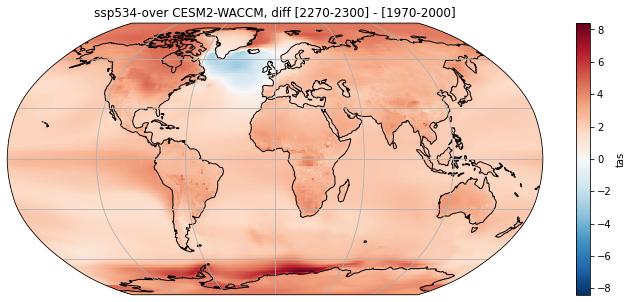

In [7]:
for ds, ssp in zip([ds1, ds2, ds4], ['ssp126 MRI-ESM2-0', 'ssp534-over MRI-ESM2-0', 'ssp534-over CESM2-WACCM']):

    t1 = ds.tas.sel(time=slice('1970','2000')).mean(dim='time')  
    t2 = ds.tas.sel(time=slice('2070','2100')).mean(dim='time')  

    plt.figure();
    # Define the map projection
    ax = plt.axes(projection=ccrs.Robinson())
    # ax is an empty plot. We now plot the variable sw_avg onto ax
    (t2-t1).plot(ax=ax, transform=ccrs.PlateCarree()) 
    # the keyword "transform" tells the function in which projection the data is stored 
    ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot
    plt.title(ssp + ', diff [2270-2300] - [1970-2000]');